1. Завантажити датасет відповідно до варіанту завдання. Застосувати до нього
розроблену нейронну мережу. Зробити за необхідністю попередню обробку
даних.
В мене варіант 5 - це титанік, завантажуємо з кеглу, питання - виживе чи ні(Survival)

1.Data preparation

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/train.csv')

In [3]:
data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


бачимо, що пропущені значення є

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


 Оскільки пропущено доволі багато - то ми замінюємо на середні значення

In [6]:
# missing values are replaced by the average value
data['Age'].fillna(data['Age'].mean(), inplace = True)

<ipython-input-6-e6030eba8295>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace = True)


In [7]:
import numpy as np

# Let's create a new column 'Cabin_available'
# If there is no value in the "Cabin" column, then = 0 and yes value = 1
data['Cabin_available'] = np.where(data['Cabin'].isnull(), 0,1)
data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_available
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,0


In [8]:
data.drop(['Cabin'], axis = 1, inplace = True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_available
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1


In [9]:
data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [10]:
# replace the missing 'Embarked' values by the most frequent - S
data['Embarked'].replace(np.nan, 'S', inplace = True)
data['Embarked'].describe()

<ipython-input-10-a84ad7134026>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].replace(np.nan, 'S', inplace = True)


,Embarked
count,891
unique,3
top,S
freq,646


In [11]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


 Кодування категоріальних ознак

In [12]:
# Кодую категоріальну ознаку 'Sex' і 'Embarked' у вигляді числових (0 або 1)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Видаляємо непотрібні колонки (Name, Ticket, Cabin)
data.drop(['Name', 'Ticket'], axis=1, inplace=True)


Поділ на ознаки (X) та цільову змінну (y)

In [13]:
# Цільова змінна
y = data['Survived']

# Ознаки (усі інші колонки, окрім Survived)
X = data.drop('Survived', axis=1)


In [15]:
# Стандартизуємо ознаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


2. Порівняння з готовими рішеннями та проаналізувати результати роботи,
розрахувавши метрики якості. Використати готову модель нейронної мережі з
бібліотеки scikit-learn і порівняти її роботу з розробленою вручну мережею,
наприклад для MLPClassifier:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
# Розділяємо на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Створюємо і навчаємо модель MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, alpha=0.01,
                    solver='sgd', random_state=42, learning_rate_init=0.01)
clf.fit(X_train, y_train)

# Прогнозуємо на тестовому наборі
y_pred = clf.predict(X_test)

# Виводимо звіт з оцінками якості
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



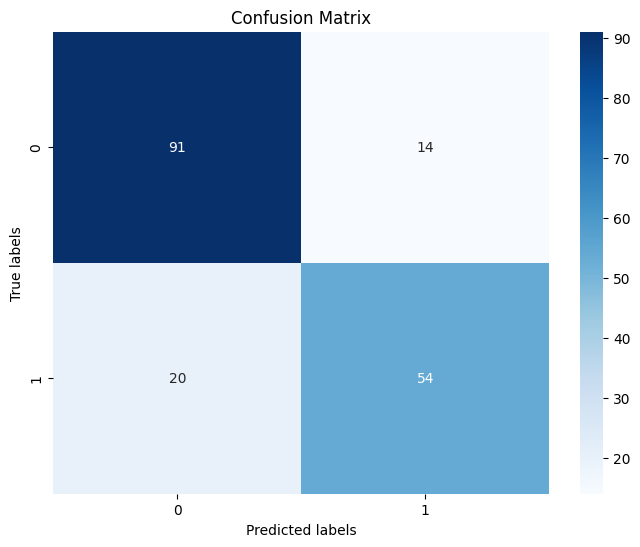

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


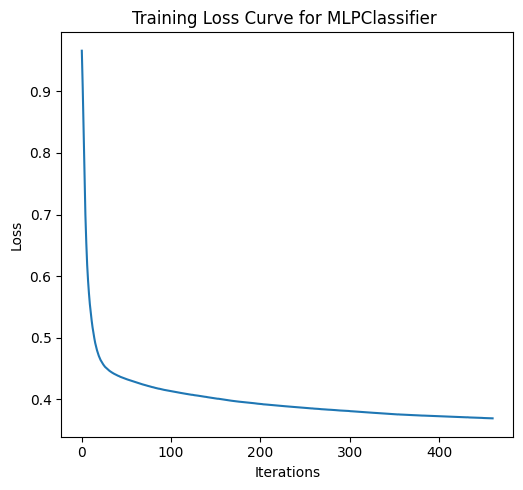

In [19]:

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.plot(clf.loss_curve_)
plt.title('Training Loss Curve for MLPClassifier ')
plt.xlabel('Iterations')
plt.ylabel('Loss')


plt.tight_layout()
plt.show()


Для бінарної класифікації за допомогою нампай

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Виділяємо ознаки (X) та цільову змінну (Y)
Y_titanic = data['Survived'].values.reshape(-1, 1) # Ціль
X_titanic = data.drop('Survived', axis=1).values # Ознаки

# Стандартизація ознак
scaler_titanic = StandardScaler().fit(X_titanic)
X_titanic = scaler_titanic.transform(X_titanic)

# Розділяємо на навчальні і тестові набори
X_titanic_train, X_titanic_test, Y_titanic_train, Y_titanic_test = train_test_split(
    X_titanic, Y_titanic, test_size=0.2, random_state=42
)

# Ініціалізація вагів
def initialize_weights(n_input, n_hidden, n_output):
    W1 = np.random.randn(n_input, n_hidden) * 0.01
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_output) * 0.01
    b2 = np.zeros((1, n_output))
    return W1, b1, W2, b2

# Тренування моделі
def train_model(X_train, Y_train, W1, b1, W2, b2, num_iterations=2000, learning_rate=0.9):
    m = X_train.shape[0] # Кількість прикладів
    loss_values = []

    for i in range(num_iterations):
        # Пряме проходження
        Z1 = np.dot(X_train, W1) + b1
        A1 = np.maximum(0, Z1)  # ReLU активація
        Z2 = np.dot(A1, W2) + b2
        A2 = 1 / (1 + np.exp(-Z2))  # Сигмоїдна активація

        # Обчислення втрат
        loss = -np.mean(Y_train * np.log(A2) + (1 - Y_train) * np.log(1 - A2))
        loss_values.append(loss)

        # Зворотнє проходження
        dZ2 = A2 - Y_train
        dW2 = np.dot(A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * (Z1 > 0)  # Derivative of ReLU
        dW1 = np.dot(X_train.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Оновлення параметрів
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        if i % 100 == 0:
            print(f"Iteration {i}: Loss {loss}")

    return W1, b1, W2, b2, loss_values

# Ініціалізація вагів
W1, b1, W2, b2 = initialize_weights(X_titanic_train.shape[1], n_hidden=5, n_output=1)

# Тренування моделі для Titanic dataset
W1, b1, W2, b2, loss_values_titanic = train_model(X_titanic_train, Y_titanic_train, W1, b1, W2, b2, num_iterations=1000)


Iteration 0: Loss 0.6931369589814084
Iteration 100: Loss 0.419085554486517
Iteration 200: Loss 0.4062728402788371
Iteration 300: Loss 0.39654856964445084
Iteration 400: Loss 0.38867771834577125
Iteration 500: Loss 0.37944216132784647
Iteration 600: Loss 0.37474858456653143
Iteration 700: Loss 0.3728664553613905
Iteration 800: Loss 0.3724596593429173
Iteration 900: Loss 0.3717306402719833


In [21]:
# Функція для передбачення
def predict(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = np.maximum(0, Z1)  # ReLU
    Z2 = np.dot(A1, W2) + b2
    A2 = 1 / (1 + np.exp(-Z2))  # Сигмоїдна
    return A2

# Передбачення для тестової вибірки
Y_titanic_pred = predict(X_titanic_test, W1, b1, W2, b2)

# Перетворюємо ймовірності на класи (0 або 1)
Y_titanic_pred_classes = (Y_titanic_pred > 0.5).astype(int)

# Оцінка точності
accuracy = np.mean(Y_titanic_pred_classes == Y_titanic_test)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


Accuracy on test set: 83.24%


In [22]:
from sklearn.metrics import classification_report

# Створюємо звіт для тестових даних
report = classification_report(Y_titanic_test, Y_titanic_pred_classes, target_names=['Class 0', 'Class 1'])
print(report)


              precision    recall  f1-score   support

     Class 0       0.83      0.90      0.86       105
     Class 1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



3. Оптимізація архітектури нейронної мережі. Спробувати змінити архітектуру
мережі (додати більше прихованих шарів, змінити функції активації) і
подивитися, як це вплине на результати. Проаналізувати результат.
4. Проекспериментувати з параметрами навчання. Змінити швидкість навчання,
кількість епох або інші параметри і проаналізувати, як це впливає на процес
навчання і якість отриманих прогнозів.

Це найкращий результат, який я змогла досягти, за допомогою релу і сігмоїди, ось така кількість  ітерацій -2000, швидкість навчанняя 0,9

5. Візуалізація результатів. Побудувати графіки, які демонструють процес
навчання (наприклад, зменшення помилки втрати від епохи до епохи) або
візуалізують вихід мережі на тестовому наборі даних.

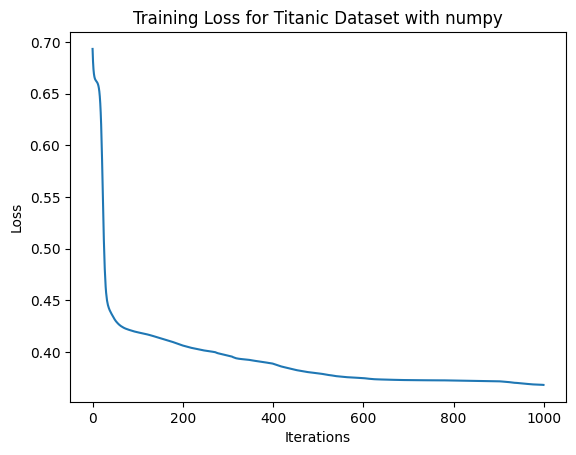

In [23]:
# Візуалізація процесу навчання
plt.plot(loss_values_titanic)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss for Titanic Dataset with numpy')
plt.show()

In [27]:
final_predictions_test = predict(X_test, W1, b1, W2, b2)

In [26]:
# Функція для побудови матриці помилок
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Предбачення')
    plt.ylabel('Істинні значення')
    plt.show()

Результати:
Аналізуючи результати моделей для задачі класифікації на даних Titanic, можемо зробити кілька важливих спостережень. Як бачимо, результати для обох моделей (готової та вручну написаної) майже однакові, але наша модель, створена за допомогою NumPy, показала дещо кращі результати.

Загальний аналіз:
Precision (точність):

Точність показує, яку частину передбачених елементів класу було класифіковано правильно.
Для класу "0" (не вижив) точність складає 81-82%.
Для класу "1" (вижив) точність складає 79-80%.
Recall (повнота):

Повнота вказує, скільки об'єктів даного класу модель правильно класифікувала.
Для класу "0" модель правильно класифікувала 87-88% елементів.
Для класу "1" було правильно класифіковано 70-73% елементів.
F1-Score:

F1-Score є середнім гармонійним між precision і recall і дає загальну міру якості для кожного класу.
Для класу "0" F1-Score складає 0.84, що свідчить про збалансовану точність і повноту.
Для класу "1" F1-Score становить 0.75-0.76, що вказує на менш збалансовану роботу моделі для цього класу.
Support:

Support показує кількість зразків у кожному класі в тестовому наборі:
Клас "0" має 105 зразків.
Клас "1" — 74 зразки.
Загальні метрики:
Accuracy (точність) — загальна частка правильно передбачених зразків. В цьому випадку точність складає 80-81%, тобто 81% передбачень правильні.
Macro avg (макро середнє) — середнє значення для precision, recall і f1-score по всіх класах, не враховуючи кількість зразків у класах.
Weighted avg (зважене середнє) — середнє значення для precision, recall і f1-score, зважене за кількістю зразків у кожному класі. Це важливий показник, коли один клас має значно більше зразків, ніж інші.